### 酔っぱらいの千鳥歩きを参考にしたランダムウォーク メトロポリス・ヘイスティングス法（MH法）を試してみた
引用者様：
https://tech.unifa-e.com/entry/2019/12/08/000000

目的：
- 勉強/履歴をnotebookにまとめて必要に応じてここから引き出す。
※少しコードに変更が加わっていることがある。

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

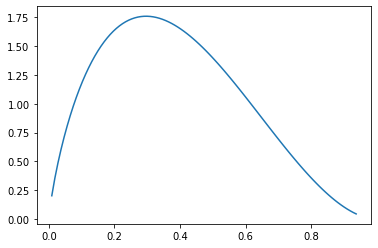

In [53]:
np.random.seed()
a, b = 1.8, 2.9
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

0.0
0.7181840781671515
0.7278839674070757
0.0
0.6764816326947563
0.0
0.032124755275369184
0.17595473554062852
0.0
0.7166412220512293
0.0
0.0
0.45607478029342663
0.3841089602881133
0.10645896181203242
0.8494222295797795
0.0
0.0
0.0
0.0
0.7867879185167399
0.6610153932496188
0.0
0.0
0.0
0.7716551983898431
0.0
0.0
0.9298675829239718
0.0
0.0
0.5750819118151527
0.8546697428105006
0.9016207707483325
0.0
0.0
0.911740114283655
0.0
0.0
0.0
0.055163150090050156
0.0
0.5015380752020403
0.0
0.0
0.0
0.4950942596038469
0.6774911312885166
0.009989544154412573
0.9964242316019983
0.0
0.0
0.057733586590863764
0.0
0.0
0.9968879130461734
0.9398714077091036
0.6999771682814984
0.0
0.0
0.9176193235861837
0.0
0.0
0.23117483450992163
0.0
0.9647157377174295
0.6140648243047826
0.0
0.0
0.821627259923929
0.24212452192228257
0.08492614974513604
0.031994677044983565
0.9999521642342444
0.6613437180501369
0.9999894436557837
0.994195760333837
0.7876568235780144
0.0
0.0
0.0
0.0
0.0009678821686284986
0.5810798656513545
0.9

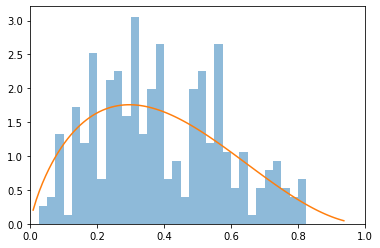

In [57]:
def rw_MH():
    # NUM_MC_STEP = 30000  # モンテカルロステップ数
    NUM_MC_STEP = 300  # モンテカルロステップ数
    theta = 0.6  # ランダムウォークの初期値
    E = 0.5  # ランダムウォークの幅
    theta_mc_step = [theta]
    
    for i in range(NUM_MC_STEP):
        re_theta = theta + E * np.random.randn()

        if beta.pdf(theta, a, b) > beta.pdf(re_theta, a, b):
            gamma = beta.pdf(re_theta, a, b) / beta.pdf(theta, a, b)
            if np.random.rand() < gamma:
                theta = re_theta
        else:
            theta = re_theta
        theta_mc_step.append(theta)
    
    return theta_mc_step
theta_mc_step = rw_MH()

plt.hist(theta_mc_step,range=(0, 1.5),bins=60, alpha=0.5, density=True)
plt.plot(x, beta.pdf(x, a, b))
plt.xlim(0,1)
plt.show()
